# Prutha Dolia 
## Assignment P2 

This project is intended to give you experience with inferential statistics. 

1. (10 pts) Each of the following processes involves sampling from a population. Please identify/define the *population* for each process.  What is the *parameter* that is of interest?
    1. A company runs a chemical process 20 times; the yield is measured each time.
    2. A pollster samples 1000 registered voters in Michigan, and asks them which candidate they support for governor.
    3. A clinical trial seeks to determine if a new drug lowers cholesterol.  100 people with high cholesterol levels are recruited try the new drug.
    4. Eight concrete polymers are produced using a new formulation, and the compressive strength of each is measured.
    5. A quality engineer needs to estimate the percentage of bolts, manufactured on a certain day, that meets a strength specification.  At 3 pm in the afternoon, he samples the last 100 bolts to be manufactured.

### Answers 

A. The population here consists of all the times the process could be run. The parameter of interest here is the yield which is measured each time the company runs the chemical process.

B. The population here consists of all the registered voters in Michigan. The parameter of interest here is the choice of the registered voters that which candidate they are supporting for the governor.

C. The population here consists of all people with high cholesterol levels. The parameter of interest here is the test result of the new drug on the people with high cholesterol levels if it lowers their cholesterol or not.

D. The population here consists of all concrete polymers that could be made from the new formulation. The parameter of interest here is the compressive strength of each concrete polymers produced using the new formulation.

E. The population here consists of all bolts manufactured that day. The parameter of interest here is the percentage of bolts that meet the particular strength specification of the sample.

2. (40 pts) We will make use of the concrete data set, https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength, which measures as it's input various ingredients and age, and as an output, the compressive strength of the concrete.  For your convenience, I have put a csv file of the data in under data/concrete.csv.  Otherwise practice how to import an Excel file with `read_excel()`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
from matplotlib import cm
import statistics as st
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv('data\concrete.csv')
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### <font color='blue'> 1. Describe the data set using some of the tools that we have learned in Chapter 2 and 3.  I'm intentionally leaving this vague as one wants to be as complete, but concise as possible.  You may (and should) visualize as appropriate. </font>

### As the column names are too big, let's shorten it

In [3]:
df.columns = ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','strength']
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
df.describe() # describing the concrete dataset.

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Given is the variable name, variable type, the measurement unit and a brief description. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

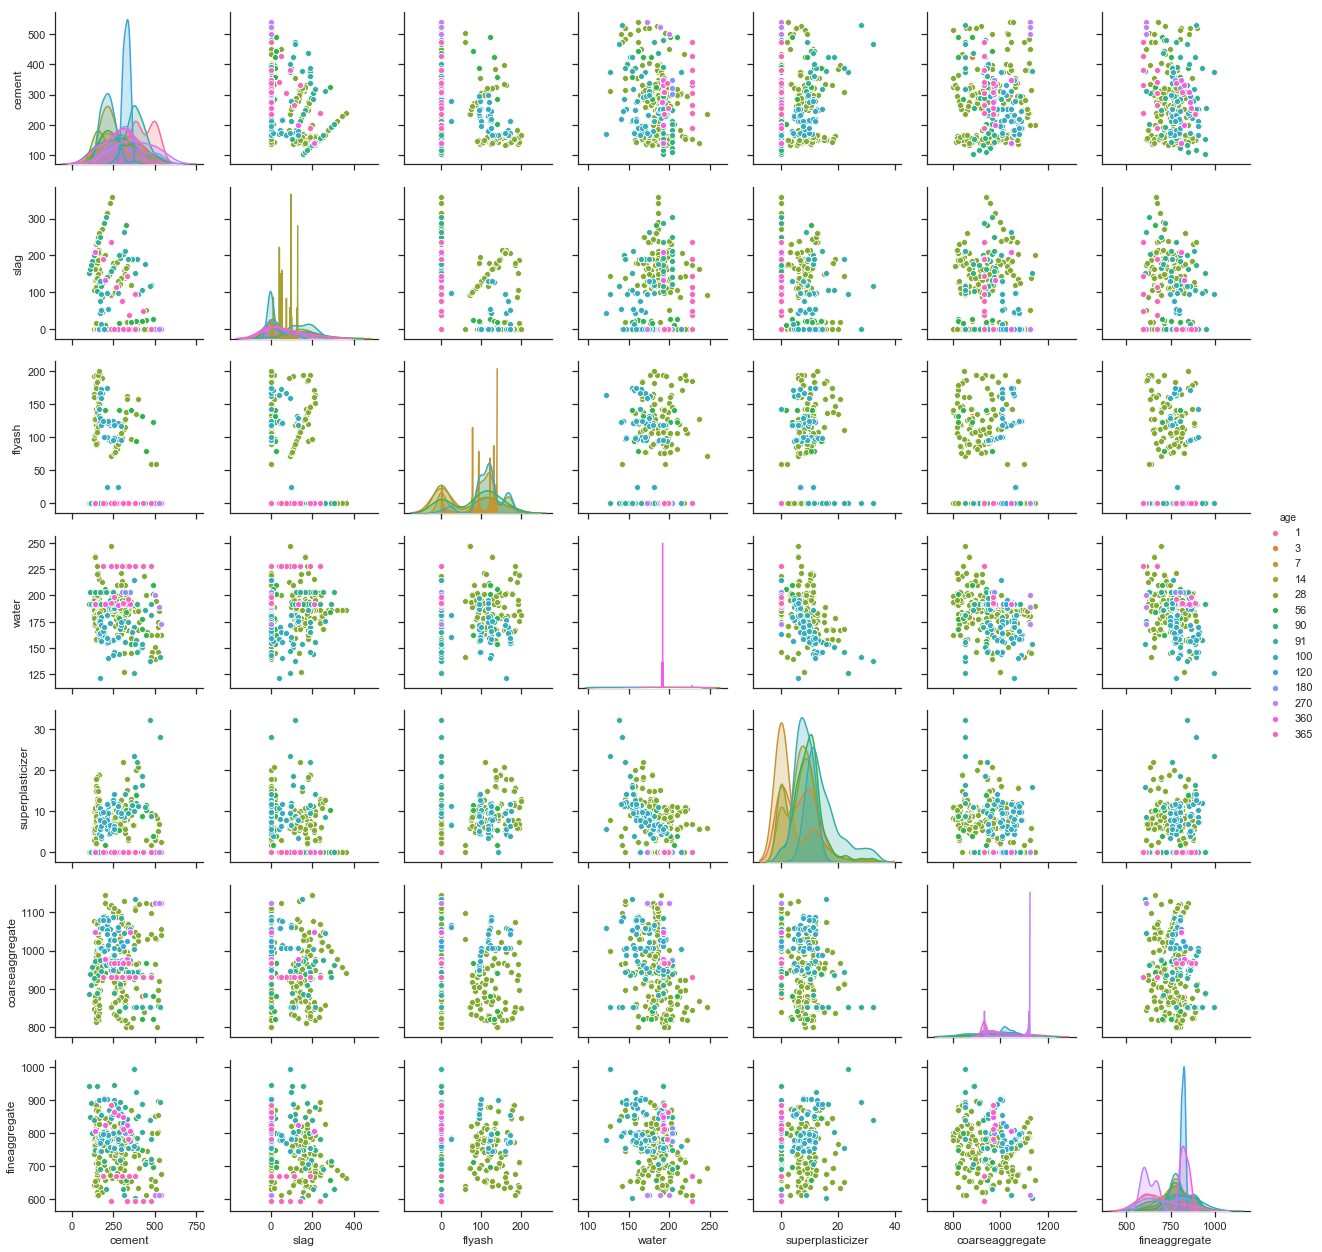

In [16]:
i = sb.pairplot(df, vars=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate'], hue = 'age')

In the concrete dataset the various ingredients and age is the input so I decided upon going up with the pairs plot. The unit of the ingredients are same i.e. "kg in a m^3 mixture" and age is like a categorical data so in this pairs plot we can see how one ingredient is related to the other and corresponds to which age group from the color category of age in the plot.

The pairs plot above is not very clear in visualizing the data for the whole concrete dataset so we can choose upon the columns for which we want to see the visualization. Below is the sample code snippet:

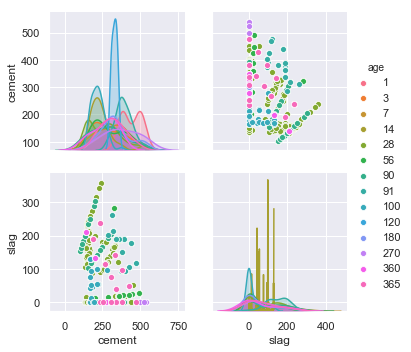

In [6]:
#pairs plot between 'cement' and 'blast furnace slag'
i = sb.pairplot(df, vars=['cement','slag'], hue = 'age')

Text(0.5, 1.0, 'Histogram for Concrete Compressive Strength')

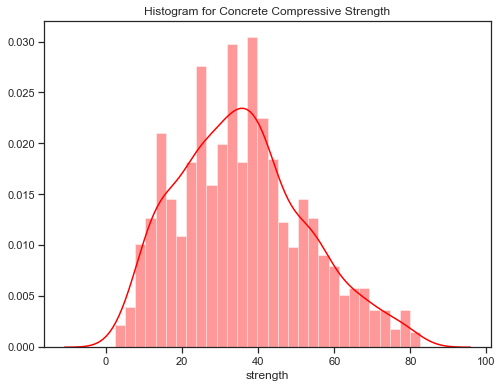

In [7]:
# Concrete compressive strength
sb.set_style('whitegrid')
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sb.distplot(df['strength'], bins=30, color ='red')               # plotting the histogram
plt.title('Histogram for Concrete Compressive Strength')

### <font color='blue'>  2. State, in your own words/understanding, the central limit theorem.  

Central Limit Theorem states that the average of a random sample will more closely resemble the average for the whole population as the sample size increases, regardless of the shape of the distribution.

Eg. If we consider a marketer of a dog food company wants to know the average age of dog owners in US so we can gather data from a sample of US dog owner and then we calculate the average age from sample. So central limit theorem says that if the sample size was large enough then the average age will be equal to average age of entire dog owner population in the US.

### <font color='blue'>  3. Run a numerical experiment, using the compressive strength variable, that demonstrates the central limit theorem at work.

Mean = 35.817961165048544


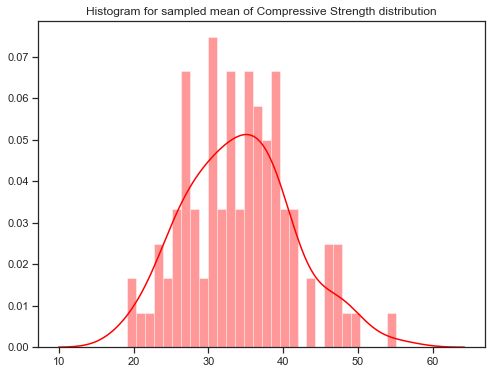

In [8]:
str1 = st.mean(df["strength"]) # Mean of compressive strength
print("Mean =",str1)

N_tests = 100  # No of test to perform
n = 5  # random sampling
means = [0] * N_tests # initializing each element to 0

# generate each sample and store the mean of each sample into our new array.
for i in range(N_tests):                                
    observations = np.random.choice(df.index.values,n)
    sampled_strength = df.loc[observations]
    means[i] = st.mean(sampled_strength["strength"])
    
sb.set_style('whitegrid')
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sb.distplot(means, bins=30, color ='red') # plotting the histogram
plt.title('Histogram for sampled mean of Compressive Strength distribution')

plt.show()

### When the sample value is small the mean is not accurate. 

Mean = 35.817961165048544


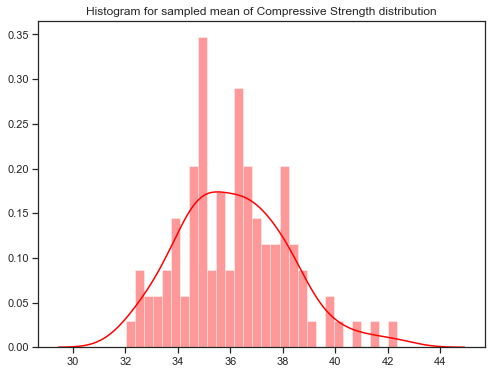

In [9]:
str1 = st.mean(df["strength"]) # Mean of compressive strength
print("Mean =",str1)

N_tests = 100  # No of test to perform
n = 50  # random sampling
means = [0] * N_tests # initializing each element to 0

# generate each sample and store the mean of each sample into our new array.
for i in range(N_tests):                                
    observations = np.random.choice(df.index.values,n)
    sampled_strength = df.loc[observations]
    means[i] = st.mean(sampled_strength["strength"])
    
sb.set_style('whitegrid')
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sb.distplot(means, bins=30, color ='red') # plotting the histogram
plt.title('Histogram for sampled mean of Compressive Strength distribution')

plt.show()

### When we increase the sample value we approach more close towards the mean. 

Mean = 35.817961165048544


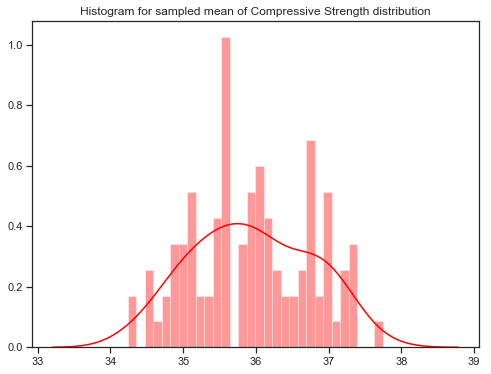

In [10]:
str1 = st.mean(df["strength"]) # Mean of compressive strength
print("Mean =",str1)

N_tests = 100  # No of test to perform
n = 500  # random sampling
means = [0] * N_tests # initializing each element to 0

# generate each sample and store the mean of each sample into our new array.
for i in range(N_tests):                                
    observations = np.random.choice(df.index.values,n)
    sampled_strength = df.loc[observations]
    means[i] = st.mean(sampled_strength["strength"])
    
sb.set_style('whitegrid')
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sb.distplot(means, bins=30, color ='red') # plotting the histogram
plt.title('Histogram for sampled mean of Compressive Strength distribution')

plt.show()

### We see that the mean calculated is close to the value as seen in the above histogram. This demonstrates the Central Limit Theorem 

### <font color='blue'>  4. Suppose that a random sample of 60 observations are chosen.  What is the probability that the sample mean of the compressive strength is less than 20 MPs? 

In [11]:
count=0
N_tests = 100 # No of test to perform
n = 60  # random sampling
means = [0] * N_tests  # initializing each element to 0

for i in range(N_tests): 
    observations = np.random.choice(df.index.values,n) # Generating 60 random observations
    sampled_strength = df.loc[observations]
    means[i] = st.mean(sampled_strength["strength"]) # Calculating the means of the 60 observations

for i in means:
    if(i<20):
        count+=1

print("The probability that the sample mean of the compressive strength is less than 20 MPs =", count/N_tests)

The probability that the sample mean of the compressive strength is less than 20 MPs = 0.0


### <font color='blue'>  5. Find the 70th upper percentile of the sample mean of the sample mean compressive strength.

In [12]:
print("The 70th upper percentile of the sample mean of the sample mean compressive strength =", "%.3f"%np.percentile(means, 70))

The 70th upper percentile of the sample mean of the sample mean compressive strength = 37.005


### <font color='blue'>  6. Develop an appropriate hypothesis, and test using confidence intervals (see section 4.4.1)

Confidence intervals are important in their own right, and not simply for their relationship to hypothesis tests. Confidence intervals give a range of plausible values for a parameter and are very useful in interpreting the results of a study.

In [13]:
mean_str = st.mean(df["strength"])
sigma_str = st.stdev(df["strength"])
print("mean =", mean_str)
print("sigma =", sigma_str)

mean = 35.817961165048544
sigma = 16.705741961912512


Here we wish to carry out a test of the NULL hypothesis that "$H_0: \mu = \mu_0$", against a 2-sided alternative "$H_a: \mu \neq \mu_0$" at a significance level of "$\alpha$".

So we proceed and use our z test statistic, come up with a p-value and draw a conclusion. But we can easily tell what the conclusion would be by looking at the confidence interval, because there is a relation between confidence intervals and hypothesis tests.

Suppose we use same value of $\alpha$ in the both spots, let $\alpha$ = 0.05 and we use a 95% confidence interval, so the $\alpha$ is same in both spots and here we are using a two sided alternative then there is a direct relation between both of them.

So the confidence interval will be made up of all the values of $\mu_0$ for which we would not reject NULL hypothesis.

In [14]:
# Arbitarirly selected.
xbar = 33.34
sigma = 13.33 

alpha = 0.05
n = 500

observations = np.random.choice(df.index.values,n) # Generating 60 random observations
sampled_strength = df.loc[observations]

mean_str = st.mean(sampled_strength["strength"])   # Calculating their mean
sigma_str = st.stdev(sampled_strength["strength"]) # Calculating their standard deviation
print("mean =", mean_str)
#print("sigma =", sigma_str)

# Standard error computation
se = sigma_str/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)

# calculating the confidence interval based upon the standard error
ci = [mean_str - sigma_str*1.96/ np.sqrt(n), mean_str + sigma_str*1.96/ np.sqrt(n)] 
print ("We are", round (confidence*100,5) , "% confident that the interval = ",  ci,  "contains the mean.")

mean = 35.38732
We are 95.0 % confident that the interval =  [33.932776582471625, 36.84186341752838] contains the mean.



Here as we increase the number of samples the confidence interval diminishes. Here we are considering the alternative hypothesis as 2-sided, so there is a direct relationship between the confidence interval and hypothesis test.

Let the hypothesised value of $\mu$ = 35, so the value falls within the interval so we would not reject the NULL hypothesis at an $\alpha$ level of 0.05 henceforth, 35 is a plausible value of $\mu$. Moreover since we are not rejecting the NULL hypothesis at at $\alpha$ = 0.05 we conclude that the p value will be greater than 0.05.

Similarly if we consider a hypothesis value of $\mu$ = 20, we see that the hypothesized value of 20 lies outside the 95% interval so we would reject the NULL hypothesis at an $\alpha$ level 0.05 which here means that the p value will be less than 0.05

### <font color='blue'>  7. Develop another appropriate hypothesis, and test using $p$-values (See section 4.4.2)

In [15]:
mu = st.mean(df["strength"])
sigma = st.stdev(df["strength"])

n = 30
observations = np.random.choice(df.index.values,n) # Generating 30 random observations
sampled_strength = df.loc[observations]
xbar = st.mean(sampled_strength["strength"])

z = (xbar - 35) / (sigma/np.sqrt(n)) # determining the standardized test static z

alpha = 0.05
pvalue = 2*(1-norm.cdf(np.abs(z))) # The factor of 2 is here because of the two-tailed test

print("The p-value is", pvalue)


if (pvalue <= alpha):
    print("We reject the null hypothesis")
elif(pvalue > alpha): # Note: This does not signify that we accept the null hypothesis as TRUE
    print("we have no evidence to reject the null hypothesis")

The p-value is 0.2761284233452739
we have no evidence to reject the null hypothesis


To use a $p$-value to make a conclusion in a hypothesis test, we compare the $p$-value with $\alpha$.

If $p$ <= $\alpha$, then reject $H_0$, else if $p$ > $\alpha$, then fail to reject $H_0$.